Fonte: https://dadosabertos.bcb.gov.br/dataset/29037-endividamento-das-familias-com-o-sistema-financeiro-nacional-em-relacao-a-renda-acumulada-dos

In [1]:
from google.colab import files
uploaded = files.upload()

Saving bcdata.sgs.29037.csv to bcdata.sgs.29037.csv


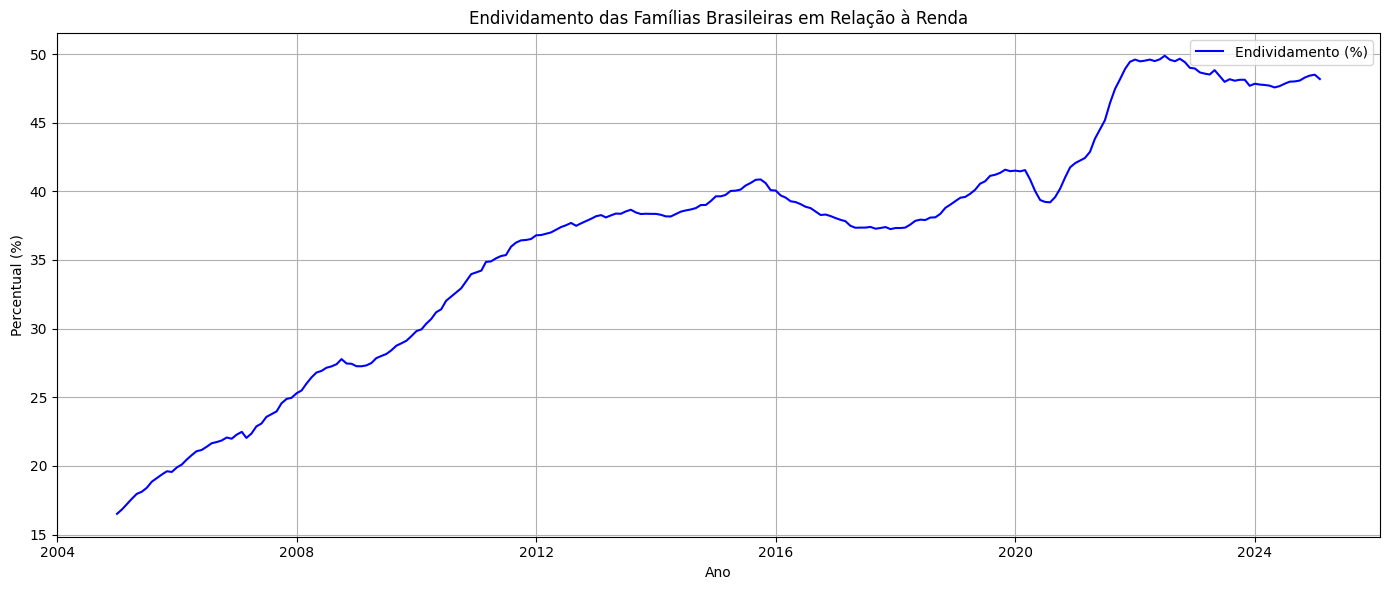

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'bcdata.sgs.29037.csv'
df = pd.read_csv(file_path, sep=';')

df['data'] = pd.to_datetime(df['data'], format='%d/%m/%Y')
df['valor'] = df['valor'].str.replace(',', '.').astype(float)

plt.figure(figsize=(14, 6))
plt.plot(df['data'], df['valor'], label='Endividamento (%)', color='blue')
plt.title('Endividamento das Famílias Brasileiras em Relação à Renda')
plt.xlabel('Ano')
plt.ylabel('Percentual (%)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Gráfico: Endividamento das Famílias Brasileiras em Relação à Renda
O gráfico mostra a evolução percentual do endividamento das famílias brasileiras em relação à sua renda total, ao longo de aproximadamente duas décadas.

Evolução ao Longo do Tempo:
2005 a 2015: Há um crescimento contínuo e acentuado do endividamento, que sobe de cerca de 17% em 2005 para mais de 40% em 2015. Esse movimento reflete o aumento da oferta e acesso ao crédito, políticas de incentivo ao consumo e maior bancarização da população nesse período.

2015 a 2018: O gráfico mostra uma estabilização seguida de leve queda, indicando um período de ajuste após a crise econômica de 2015-2016. Nesse intervalo, houve maior cautela das famílias em assumir dívidas, ao mesmo tempo em que o mercado de crédito ficou mais restrito.

2019 a 2020: O endividamento volta a crescer gradualmente até o início da pandemia, mas com oscilações. Em 2020, observa-se uma queda abrupta, possivelmente associada à incerteza econômica e à redução do consumo durante os primeiros meses da pandemia da COVID-19.

2021 a 2023: Nesse período, há um aumento expressivo e acelerado do endividamento, atingindo o pico de quase 50% em 2022. Esse crescimento pode ser explicado pelo uso intenso do crédito para manter o consumo durante a crise sanitária e a alta da inflação, além do crescimento do crédito consignado e do uso do cartão de crédito.

2023 em diante: O gráfico mostra uma ligeira queda e posterior estabilização, sugerindo uma possível retomada do controle financeiro pelas famílias ou o endurecimento das condições de crédito por parte das instituições financeiras.

Conclusão: O gráfico revela uma tendência clara de crescimento do endividamento das famílias brasileiras em relação à renda, com variações relacionadas a eventos econômicos e sociais importantes, como crises financeiras e a pandemia.

O pico recente, próximo a 50% da renda comprometida com dívidas, é preocupante do ponto de vista da sustentabilidade financeira das famílias, pois pode comprometer o consumo futuro e aumentar o risco de inadimplência.

Esse cenário exige atenção por parte de formuladores de políticas públicas, instituições financeiras e educadores financeiros, para promover medidas de educação financeira, regulação de crédito e estímulo à poupança, evitando o superendividamento e seus impactos econômicos e sociais.



---



Fontes: https://dadosabertos.bcb.gov.br/dataset/24886-quantidade-de-sedes-de-instituicoes-autorizadas-a-funcionar-na-regiao-sul

https://dadosabertos.bcb.gov.br/dataset/24881-quantidade-de-sedes-de-instituicoes-autorizadas-a-funcionar-no-brasil

In [3]:
from google.colab import files

uploaded = files.upload()

Saving bcdata.sgs.24881.csv to bcdata.sgs.24881.csv
Saving bcdata.sgs.24886.csv to bcdata.sgs.24886.csv


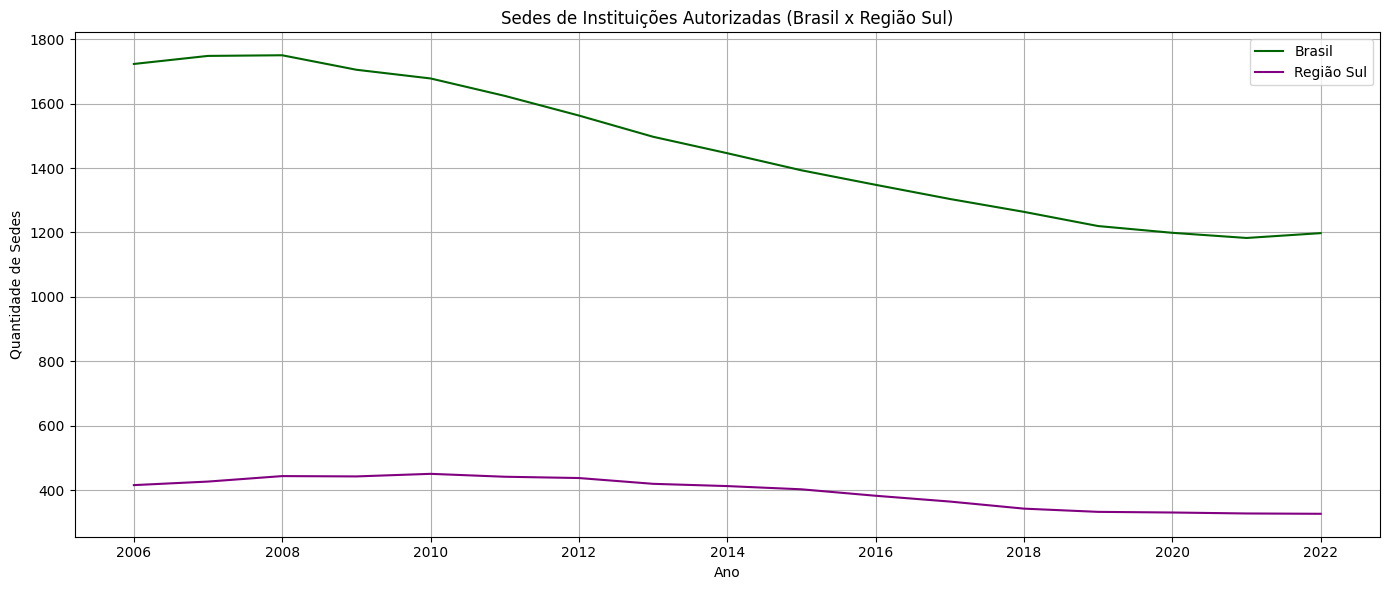

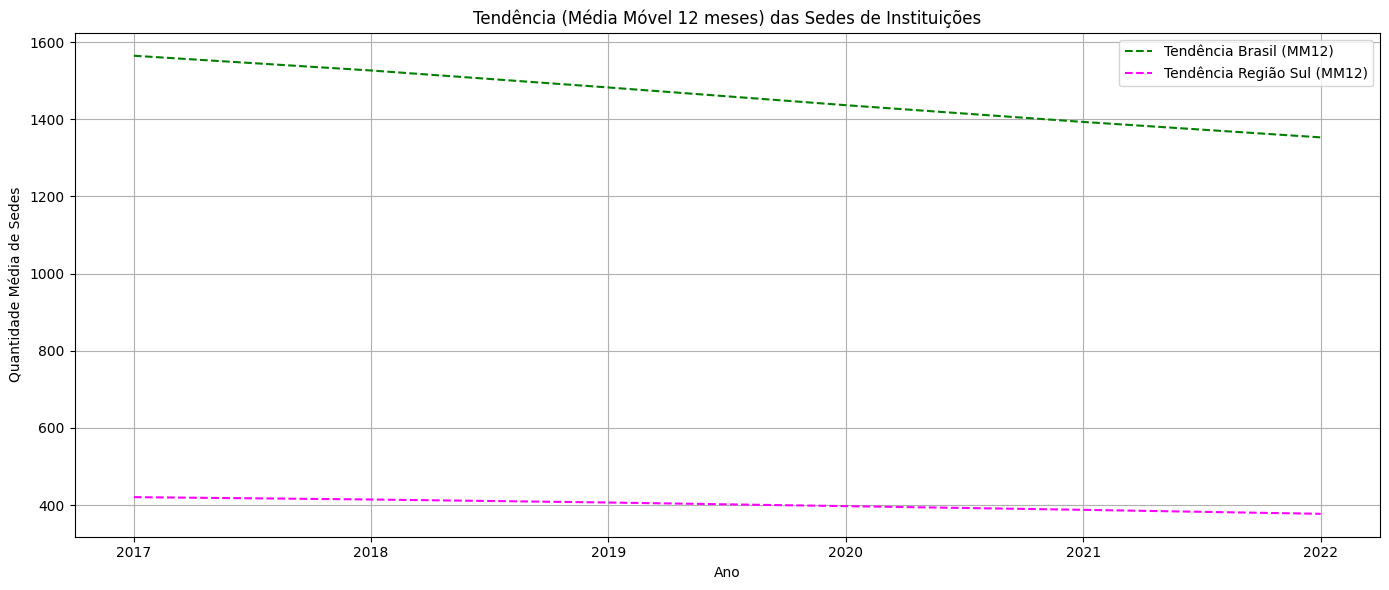

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

#Lendo os arquivos CSV
file_brasil = 'bcdata.sgs.24881.csv'
file_sul = 'bcdata.sgs.24886.csv'

#Leitura e tratamento dos dados
df_brasil = pd.read_csv(file_brasil, sep=';')
df_sul = pd.read_csv(file_sul, sep=';')

#Convertendo as datas
df_brasil['data'] = pd.to_datetime(df_brasil['data'], format='%d/%m/%Y')
df_sul['data'] = pd.to_datetime(df_sul['data'], format='%d/%m/%Y')

#Convertendo os valores para float
df_brasil['valor'] = df_brasil['valor'].astype(str).str.replace(',', '.').astype(float)
df_sul['valor'] = df_sul['valor'].astype(str).str.replace(',', '.').astype(float)

#Renomeando colunas
df_brasil.columns = ['data', 'sede_brasil']
df_sul.columns = ['data', 'sede_sul']

#Juntando os dois conjuntos pela data
df = pd.merge(df_brasil, df_sul, on='data', how='inner')

#Plotando a série temporal original
plt.figure(figsize=(14, 6))
plt.plot(df['data'], df['sede_brasil'], label='Brasil', color='darkgreen')
plt.plot(df['data'], df['sede_sul'], label='Região Sul', color='purple')
plt.title('Sedes de Instituições Autorizadas (Brasil x Região Sul)')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Sedes')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

#Cálculo da tendência com média móvel de 12 meses
df['tend_brasil'] = df['sede_brasil'].rolling(window=12).mean()
df['tend_sul'] = df['sede_sul'].rolling(window=12).mean()

#Plotando a tendência suavizada
plt.figure(figsize=(14, 6))
plt.plot(df['data'], df['tend_brasil'], label='Tendência Brasil (MM12)', linestyle='--', color='green')
plt.plot(df['data'], df['tend_sul'], label='Tendência Região Sul (MM12)', linestyle='--', color='magenta')
plt.title('Tendência (Média Móvel 12 meses) das Sedes de Instituições')
plt.xlabel('Ano')
plt.ylabel('Quantidade Média de Sedes')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Gráfico 1: O primeiro gráfico apresenta a evolução mensal da quantidade de sedes de instituições financeiras autorizadas a funcionar, tanto no Brasil como na Região Sul, ao longo do tempo.

A curva referente ao Brasil (linha verde escura) mostra valores significativamente mais altos, como esperado, por se tratar da totalidade do país. Já a Região Sul (linha roxa) exibe uma quantidade menor, mas com um comportamento semelhante ao da série nacional.

É possível perceber que ambas as séries apresentam oscilações regulares, com períodos de crescimento e queda. Essas variações podem estar associadas a fatores como abertura ou encerramento de agências bancárias, mudanças nas normas do Banco Central, fusões de instituições ou alterações no cenário econômico nacional. O gráfico mostra que, apesar das flutuações, há certa sincronia no comportamento das duas regiões, indicando que as mesmas tendências macroeconômicas afetam o país como um todo e suas regiões de forma proporcional.

Gráfico 2: O segundo gráfico mostra a tendência suavizada das séries temporais utilizando uma média móvel de 12 meses. Essa técnica é útil para eliminar variações pontuais e evidenciar o movimento estrutural de longo prazo dos dados.

As linhas tracejadas revelam claramente uma tendência de queda na quantidade de sedes ao longo dos anos, tanto no Brasil (linha verde tracejada) quanto na Região Sul (linha magenta tracejada). Essa redução gradual sugere que instituições financeiras vêm diminuindo sua presença física, o que pode estar relacionado à expansão dos canais digitais (como internet banking, aplicativos de celular e atendimento remoto).

Apesar da queda geral, observa-se que a Região Sul mantém uma estabilidade maior, com uma curva menos inclinada. Isso pode indicar uma base institucional mais consolidada ou uma demanda regional que ainda justifica a manutenção de sedes físicas.

Conclusão: A análise dos dois gráficos indica uma tendência clara de redução na quantidade de sedes de instituições financeiras no Brasil e na Região Sul ao longo do tempo. Essa diminuição pode ser explicada por uma série de fatores, entre eles:

A transformação digital do setor financeiro, que tem reduzido a necessidade de agências físicas;

O aumento da eficiência operacional das instituições, com o fechamento de unidades menos rentáveis;

A consolidação do mercado, com fusões e aquisições que resultam no fechamento de sedes duplicadas.

Mesmo com valores absolutos diferentes, a evolução das duas séries é bastante similar, reforçando a ideia de que as decisões estratégicas no setor financeiro têm impacto nacional, com reflexos proporcionais nas diferentes regiões do país.

Essas observações são importantes para entender o comportamento do setor bancário e para embasar políticas públicas ou decisões empresariais voltadas à inclusão financeira, planejamento urbano ou desenvolvimento regional.